In [ ]:
# import some librairies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('data/diabetes_prediction_dataset.csv')
df.head()

## Data Analysis

Duplicate rows do not provide any useful information to the model, so we drop them.

In [ ]:
df.duplicated().sum()
print(f"Number of dropped rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

There is an extra category in `gender` called 'Other'. It is not frequent in the data, its instances are never from diabetic cases and their characteristics (BMI, blood glucose, etc.) don't seem to differ from the rest of the data, apart from a slightly younger average age. We will drop these instances for the reasons we just stated.

In [ ]:
df[df["gender"] == "Other"].describe()

In [ ]:
df[df['gender'] != 'Other'].describe()

OPINION:
Females are more recurrent than males in the dataset, the emodel will probably have a harder time correctly diagnosing male patients, since their number of samples are lower. I have to verify this

In [ ]:
df = df[df['gender'] != 'Other']
print(df['gender'].value_counts())

plt.title('Gender Count')
sns.histplot(data=df, x='gender', hue='diabetes');

In [ ]:
df.info()

In [ ]:
print(f'There are {df.isnull().sum().sum()} samples containing missing values')

## Data Visualisation

### Univariate Analysis

In [ ]:
vc = df['diabetes'].value_counts()
print(f'Diabetic samples: {vc[1]}')
print(f'Non-diabetic samples: {vc[0]}')

plt.title('Diabetes Count')
sns.countplot(data=df, x='diabetes');

In [ ]:
vc = df['hypertension'].value_counts()
print(f'Hypertension samples: {vc[1]}')
print(f'Non-hypertension samples: {vc[0]}')

plt.title('Hypertension count')
sns.countplot(data=df, x='hypertension');

In [ ]:
vc = df['heart_disease'].value_counts()
print(f'Heart disease samples: {vc[1]}')
print(f'Non-heart disease samples: {vc[0]}')

plt.title('heart_disease Count')
sns.countplot(data=df, x='heart_disease');

### BMI (Body Mass Index)

In [ ]:
print(f"Description of the BMI column: \n{df['bmi'].describe()}")

plt.figure(figsize=(8, 6))
sns.histplot(df['bmi'], kde=True, bins=50)
plt.xlim(10, 60)
plt.title('Distribution de BMI')
plt.show()

The value 27.32 occurs an unnormal amount of times in the data.

In [ ]:
# Percentage of the values
df.bmi.value_counts(normalize=True).head()*100

This value is, most probably, the default or mean value for the standard medical category "Overweight", which is people with a BMI in the range [25, 30)*. We can see below that the mean value of overweight people, excluding the value 27.32, is 27.39.

*Source: [cancer.org](https://www.cancer.org/cancer/risk-prevention/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html)

In [ ]:
df[(df['bmi'] >= 25) &
   (df['bmi'] < 30) &
   (df['bmi'] != 27.32)]['bmi'].describe()

We have decided to leave this value as it is, because the BMI variable is a continuous one. This means that transforming it into a categorical variable with value ranges would make us lose important information about the patient without providing any benefit to prediction quality.

### Age

Age ranges are mostly balanced in our data, except for the age 80, which is over-represented.

In [ ]:
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age distribution')
plt.show()

In [ ]:
df['age'].value_counts(normalize=True).head()*100

Our data correctly reflects the prevalence of diabetes in older adults, giving adults over 80 years old an occurrence rate of around 20%. [This source](https://www.kff.org/other/state-indicator/adults-with-diabetes-by-age/?currentTimeframe=0&selectedDistributions=ages-75&selectedRows=%7B%22wrapups%22:%7B%22united-states%22:%7B%7D%7D%7D&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D) confirms that this percentage is correct.

In [ ]:
print(f"Diabetics under 80 y/o: {round(df[df['age'] < 80]['diabetes'].mean()*100, 2)}%")
print(f"Diabetics at 80 y/o: {round(df[df['age'] >= 80]['diabetes'].mean()*100, 2)}%")

smoking history

In [ ]:
print(df['smoking_history'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Frequency of categories in smoking history')
plt.show()

blood glucose level

In [ ]:
# print(df['blood_glucose_level'].value_counts())
print(f"Number of unique values: {df['blood_glucose_level'].nunique()}")
print(f"Total number of values: {df['blood_glucose_level'].count()}")

plt.title('blood_glucose_level Count')
sns.countplot(data=df, x='blood_glucose_level')

### Multi-variate Analysis

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns  # 
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show()


age

In [ ]:
sns.displot(kind='kde', data=df, x='age', hue='diabetes', fill=True)

In [ ]:
ax = sns.catplot(kind='box', data=df, x='diabetes', y='age',hue='diabetes')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, alpha=1.0, data=df)
plt.title('Relationship between age, BMI and diabetes')
plt.show()

Diabetes and Gender column

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Filter diabetic individuals
diabetic_individuals = df[df['diabetes'] == 1]

# Calculate the number of diabetics by gender
diabetic_counts = diabetic_individuals['gender'].value_counts()

# Calculate the percentages
diabetic_percentages = (diabetic_counts / len(diabetic_individuals)) * 100

# Create the bar plot
colors = ['pink' if gender == 'Female' else 'blue' for gender in diabetic_percentages.index]
plt.bar(diabetic_percentages.index, diabetic_percentages, color=colors)

# Add bar labels
for i, val in enumerate(diabetic_percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage of Diabetics')
plt.title('Percentage of Diabetics by Gender')

# Display the plot
plt.show()

In [ ]:
female_count = len(df[df['gender'] == 'Female'])
male_count = len(df[df['gender'] == 'Male'])
percentage_more_female = (female_count - male_count) / len(df) * 100

print(f"Number of females: {female_count}")
print(f"Number of males: {male_count}")
print(f"There are {percentage_more_female:.2f}% more females than males.")


temp_df = pd.crosstab(df['gender'], df['diabetes'], normalize='columns')*100
sns.heatmap(temp_df, annot=True, cmap='summer')



HbA1c levels

In [ ]:
ax = sns.catplot(data=df, x='diabetes', y='HbA1c_level', kind='box')
ax.set(title='Diabetes vs HbA1c Level')
ax.set_xticklabels(['No Diabetes', 'Diabetes'])

In [ ]:
# Create a new Boolean variable
df['high_blood_glucose'] = df['blood_glucose_level'] > 220

# Calculate the correlation coefficient
correlation = df['diabetes'].corr(df['high_blood_glucose'])
print('Correlation: ', correlation)


In [ ]:
# Separating the data based on diabetes
diabetes_positive = df[df['diabetes'] == 1]
diabetes_negative = df[df['diabetes'] == 0]

# Creating the scatter plot
plt.scatter(diabetes_positive['HbA1c_level'], diabetes_positive['blood_glucose_level'], color='red', label='Diabetes')
plt.scatter(diabetes_negative['HbA1c_level'], diabetes_negative['blood_glucose_level'], color='blue', label='No Diabetes')

# Adding labels and title
plt.xlabel('HbA1c Level')
plt.ylabel('Blood Glucose Level')
plt.title('Correlation between HbA1c Level, Blood Glucose Level, and Diabetes')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

In [ ]:
# Filter the data based on the conditions
filtered_data = df[(df['HbA1c_level'] > 7) & (df['blood_glucose_level'] > 200)]

# Extract the values of HbA1c_level and blood_glucose_level
hbA1c_values = filtered_data['HbA1c_level']
blood_glucose_values = filtered_data['blood_glucose_level']
diabetes_presence = filtered_data['diabetes']

# Calculate the correlation
correlation = np.corrcoef(hbA1c_values, blood_glucose_values)[0, 1]

# Display the results
print("Correlation between HbA1c Level and Blood Glucose Level for individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Correlation coefficient: {correlation:.2f}")
print(f"Presence of diabetes count: {diabetes_presence.sum()}")


In [ ]:
# Filter out diabetics with blood glucose > 200
diabetes_high_glucose = df[(df['diabetes'] == 1) & (df['blood_glucose_level'] > 200)]
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with blood glucose > 200: {percentage_diabetes_high_glucose:.2f}%")

# Filter diabetic individuals with HbA1c > 7
diabetes_high_HbA1c = df[(df['diabetes'] == 1) & (df['HbA1c_level'] > 7)]
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100
print(f"Percentage of diabetics with HbA1c > 7: {percentage_diabetes_high_HbA1c:.2f}%")

# with and condition
diabetes_percentage = (diabetes_presence.mean()) * 100
print("Percentage of diabetes among individuals with HbA1c > 7 and blood glucose > 200:")
print(f"Percentage of individuals with HbA1c > 7 and blood glucose > 200: {diabetes_percentage:.2f}%")


# Calculate the percentages
percentage_diabetes_high_glucose = (len(diabetes_high_glucose) / len(df[df['diabetes'] == 1])) * 100
percentage_diabetes_high_HbA1c = (len(diabetes_high_HbA1c) / len(df[df['diabetes'] == 1])) * 100

# Create the bar plot
categories = ['Blood Glucose > 200', 'HbA1c > 7']
percentages = [percentage_diabetes_high_glucose, percentage_diabetes_high_HbA1c]

plt.bar(categories, percentages)

# Add bar labels
for i, val in enumerate(percentages):
    plt.text(i, val, f"{val:.2f}%", ha='center', va='bottom')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Percentage of Diabetics with High Blood Glucose or HbA1c')

# Display the plot
plt.show()

Smoking history

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Distribution of blood glucose levels in people with and without diabetes')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoking_history', y='age', data=df, order = df['smoking_history'].value_counts().index)
plt.title('Age distribution among different categories of smoking history')
plt.show()

BMI and Diabetes

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='diabetes', palette={0: 'blue', 1: 'red'}, data=df)
plt.title('Relationship between age, BMI and diabetes')
plt.show()

# Train part

## Encoding

In [ ]:
df_copy = df.copy()
df_copy.info()

In [ ]:
# Show NaN values
print(f"Number of NaN values in the dataset: {df_copy.isna().sum().sum()}")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_copy['gender'] = le.fit_transform(df_copy['gender'])

df_copy = pd.get_dummies(df_copy, columns=['smoking_history'], drop_first=True)

df_copy['high_blood_glucose'] = df_copy['high_blood_glucose'].astype(int)

In [ ]:
# Show NaN values
print(f"Number of NaN values in the dataset: {df_copy.isna().sum().sum()}")

In [ ]:
X = df_copy.drop('diabetes', axis=1)
y = df_copy['diabetes']

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipe = Pipeline([('classifier', RandomForestClassifier())])


# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__max_depth":[5,8,15,25,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15],
                 "classifier__max_leaf_nodes": [2, 5,10]},
                {"classifier": [SVC()],
                 "classifier__kernel": ['linear', 'rbf'],
                 "classifier__C": [1, 10, 100]},
                {"classifier": [GradientBoostingClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__learning_rate": [0.001, 0.01, 0.1],
                 "classifier__subsample": [0.5, 0.7, 1.0],
                 "classifier__max_depth": [3, 7, 9]},
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [3, 5, 11],
                 "classifier__weights": ["uniform", "distance"],
                 "classifier__metric": ["euclidean", "manhattan"]},
                {"classifier": [AdaBoostClassifier()],
                 "classifier__n_estimators": [50, 100, 150],
                 "classifier__learning_rate": [0.001, 0.01, 0.1]}
                ]

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average='macro'),
           'recall': make_scorer(recall_score, average='macro'),
           'f1': make_scorer(f1_score, average='macro')}

# Loop over the different scores
for score_name, score_func in scoring.items():
    gridsearch = GridSearchCV(pipe, search_space, cv=5, scoring=score_func, n_jobs=-1)

    best_model = gridsearch.fit(X_train, y_train)

    print(f"Best model for {score_name}: {best_model.best_estimator_}")
    print(f"Best parameters for {score_name}: {best_model.best_params_}")
    print(f"Best score for {score_name}: {best_model.best_score_}\n")



In [15]:
params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50, 'subsample': 1.0}

best_model_acc = GradientBoostingClassifier(**params)

best_model_acc.fit(X_train, y_train)

y_pred_acc = best_model_acc.predict(X_test)

In [16]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_acc)
precision = precision_score(y_test, y_pred_acc)
recall = recall_score(y_test, y_pred_acc)
f1 = f1_score(y_test, y_pred_acc)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9694164152709872
Precision: 0.9834926151172894
Recall: 0.6654908877131099
F1 Score: 0.79382889200561


In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    GradientBoostingClassifier(), X, y, param_name="learning_rate", param_range=param_range,
    scoring="accuracy", n_jobs=1)

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred)
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred, normalize='true')
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues') 
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

y_score = best_model.predict_proba(X_test)[:,1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [17]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use SMOTE to oversample the dataset for better training performance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Compute the scale_pos_weight value
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# Define the model with scale_pos_weight
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight)

# Fit the model
xgb.fit(X_train_res, y_train_res)

# Predict
y_pred = xgb.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

# Print the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report: \n", cr)

Confusion Matrix: 
 [[15497  2028]
 [  159  1542]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     17525
           1       0.43      0.91      0.59      1701

    accuracy                           0.89     19226
   macro avg       0.71      0.90      0.76     19226
weighted avg       0.94      0.89      0.90     19226



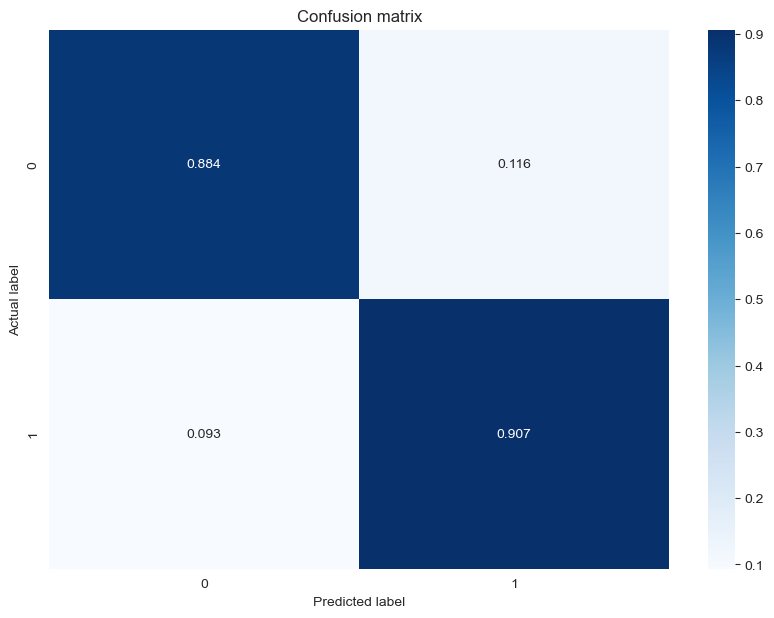

In [18]:
# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred, normalize='true')
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".3f", cmap='Blues') 
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

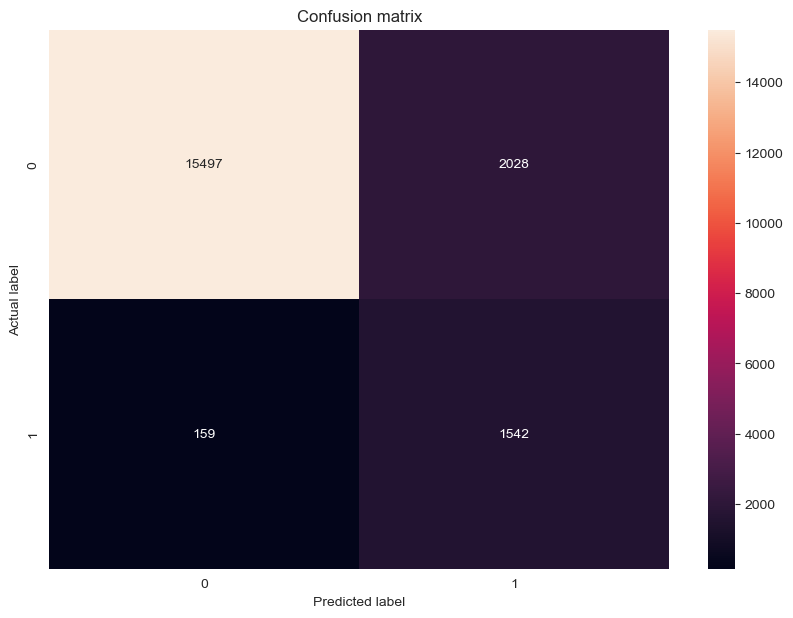

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm  = confusion_matrix(y_test, y_pred)
    
# Visualize it
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

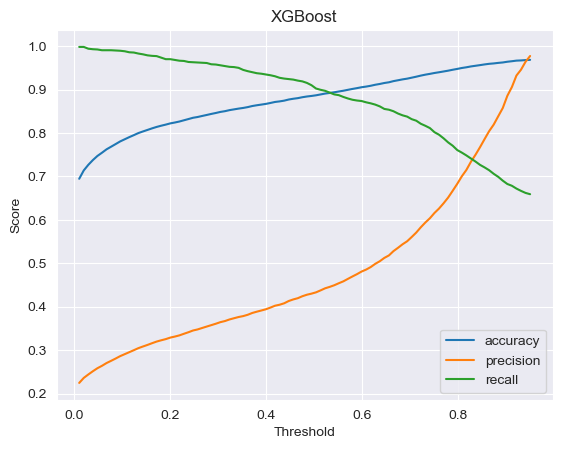

In [20]:
from collections import defaultdict
scores = defaultdict(list)
test_vals = np.linspace(0.01, .95, 100)
for threshold in test_vals:
    y_pred = xgb.predict_proba(X_test)
    y_pred = y_pred[:, 1] > threshold

    scores['accuracy'].append(accuracy_score(y_test, y_pred))
    scores['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    scores['recall'].append(recall_score(y_test, y_pred))

for measure in scores.keys():
    sns.lineplot(y=scores[measure], x=test_vals, label=measure)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('XGBoost')
plt.legend();

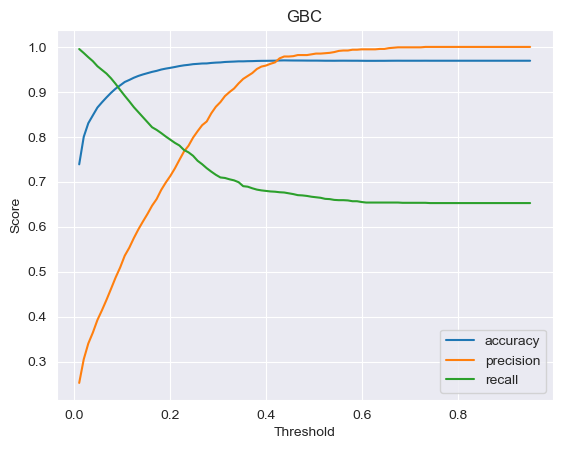

In [21]:
scores = defaultdict(list)
test_vals = np.linspace(0.01, .95, 100)
for threshold in test_vals:
    y_pred = best_model_acc.predict_proba(X_test)
    y_pred = y_pred[:, 1] > threshold

    scores['accuracy'].append(accuracy_score(y_test, y_pred))
    scores['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    scores['recall'].append(recall_score(y_test, y_pred))

for measure in scores.keys():
    sns.lineplot(y=scores[measure], x=test_vals, label=measure)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('GBC')
plt.legend();

The choice of the model and the threshold for diagnosis are the most important aspects of our final decision as a group. These will determine the quality and validity of our predictions.

XGBoost seems to manage to maintain a high recall for high threshold levels, but that comes at the cost of a very low precision relative to GradientBoosting. This means that while we would be able to correctly diagnose most of the diabetic cases, we would incorrectly classify more than half of our patients (for a threshold of around 55%, where recall is at 90%).

In contrast, our GBC model loses on its recall score very quickly, allowing for a 90% detection rate of diabetes for a threshold of around 8%. For the same level of recall as XGBoost though, this model attains around 53% precision.

If we allow ourselves to correctly classify 80% of diabetic cases instead of 90%, XGBoost manages a precision score of around 62%, while GBC attains 70% precision for the same recall score.

GBC seems to be a better choice given these findings.